In [3]:
# 시계열 : 어떤 관측결과를 시간 축에 따라 계열화한 데이터
"""
- 타임스탬프 : 특정 시점 ex.) 2021-10-27 07:00:00 
- 시간 간격 : 두 시점 사이의 시간 구간
- 기간 : 특정 시작일/ 종료일로 표현되는 시간 구간 2021-10-27 07:00:00 ~ 2021-10-28 23:00:00
- 지속기간 : 시간 구간의 길이
"""

# dateti,e. dateutil : 시계열 처리를 위한 파이썬 내장 모듈

#  datetime 날짜 정의
"""
기본 파이썬 날짜와 시간: datetime, dateutil

NumPy : datetime64()

Pandas : to_datetime(), to_timedelta()
"""
from datetime import datetime

t = datetime(year = 2021, month = 10, day = 27)
print(t)
print(type(t)) 

2021-10-27 00:00:00
<class 'datetime.datetime'>


In [2]:
# 문자열 파싱을 통한 날짜 해석

from dateutil import parser
date = parser.parse("27th of October, 2021") # parser 클래스 parse 메서드
print(date)

2021-10-27 00:00:00


In [8]:
# datetime 요일 출력 strftime() 사용

date.strftime('%A')

'Wednesday'

In [32]:
# Numpy의 datetime64 : 배열 형태로 시간 처리에 유리

# - datetime64 객체 생성 : np.array() 또는 np.datetime64()

import numpy as np
dates = np.array(['2021-10-27', '2021-10-28'], dtype = np.datetime64)
print(type(dates[0]))

date = np.datetime64('2021-10-28')
print(date)

<class 'numpy.datetime64'>
2021-10-28


In [33]:
date + np.arange(7) #[0,1,...6]

array(['2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31',
       '2021-11-01', '2021-11-02', '2021-11-03'], dtype='datetime64[D]')

In [54]:
# 시간 빈도 설정

# 분단위까지 설정하면 표현가능

t = np.datetime64('2021-10-28 11:38') 
print(t)

# 시간 단위를 나노초로 설정

t = np.datetime64('2021-10-28 11:39:10.20', 'ns') 
print(t)

2021-10-28T11:38
2021-10-28T11:39:10.200000000


In [4]:
# Pandas 에서의 날짜/시간 처리

import pandas as pd
date = pd.to_datetime("27th of October, 2021")
print(date)

2021-10-27 00:00:00


In [36]:
date.strftime('%A')

'Wednesday'

In [37]:
date + pd.to_timedelta(np.arange(7))

DatetimeIndex([          '2021-10-27 00:00:00',
               '2021-10-27 00:00:00.000000001',
               '2021-10-27 00:00:00.000000002',
               '2021-10-27 00:00:00.000000003',
               '2021-10-27 00:00:00.000000004',
               '2021-10-27 00:00:00.000000005',
               '2021-10-27 00:00:00.000000006'],
              dtype='datetime64[ns]', freq=None)

In [50]:
ind = pd.DatetimeIndex(['2021-10-27','2021-10-28','2021-10-29','2021-10-30',
                        '2021-10-31', '2021-11-01','2021-11-02'])

print(ind)

ser = pd.Series([0,1,2,3,4,5,6], index=ind)

print(ser)

DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-11-01', '2021-11-02'],
              dtype='datetime64[ns]', freq=None)
2021-10-27    0
2021-10-28    1
2021-10-29    2
2021-10-30    3
2021-10-31    4
2021-11-01    5
2021-11-02    6
dtype: int64


In [49]:
ser['2021-10-27':'2021-10-31']

2021-10-27    0
2021-10-28    1
2021-10-29    2
2021-10-30    3
2021-10-31    4
dtype: int64

In [45]:
ser['2021-11']

2021-11-01    5
2021-11-02    6
dtype: int64

In [47]:
ser['2021']

2021-10-27    0
2021-10-28    1
2021-10-29    2
2021-10-30    3
2021-10-31    4
2021-11-01    5
2021-11-02    6
dtype: int64

In [57]:
"""
시계열 데이터를 위한 pandas 데이터 구조
- 타임스탬프 : Timestamp, DatetimeIndex
- 기간 : Period, PeriodIndex
- 지속기간 : Timedelta, TimedeltaIndex
"""

# Timestamp, DatetimeIndex : 날짜/시간을 표현하는 기본적인 객체

dates = pd.to_datetime([datetime(2015, 7, 3), 
                    "4th of July, 2015", 
                    '2015-Jul-6',
                    '07-07-2015',
                    '20150708'])

print(dates)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)


In [63]:
dates.to_period('W')

PeriodIndex(['2015-06-29/2015-07-05', '2015-06-29/2015-07-05',
             '2015-07-06/2015-07-12', '2015-07-06/2015-07-12',
             '2015-07-06/2015-07-12'],
            dtype='period[W-SUN]', freq='W-SUN')

In [65]:
# 시간차 계산

dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [67]:
# 옵션 default 값이 day 

pd.date_range('2021-10-27', '2021-10-31')

DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31'],
              dtype='datetime64[ns]', freq='D')

In [70]:
pd.date_range('2021-10-27', periods = 5)

DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31'],
              dtype='datetime64[ns]', freq='D')

In [7]:
# 빈도 설정 : 원하는 시간 단위의 시퀀스 생성

pd.date_range('2021-10-27', periods = 12, freq ='H')

DatetimeIndex(['2021-10-27 00:00:00', '2021-10-27 01:00:00',
               '2021-10-27 02:00:00', '2021-10-27 03:00:00',
               '2021-10-27 04:00:00', '2021-10-27 05:00:00',
               '2021-10-27 06:00:00', '2021-10-27 07:00:00',
               '2021-10-27 08:00:00', '2021-10-27 09:00:00',
               '2021-10-27 10:00:00', '2021-10-27 11:00:00'],
              dtype='datetime64[ns]', freq='H')

In [12]:
pd.timedelta_range(0, periods = 10, freq = 'H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [10]:
pd.date_range('2021-11-01', periods = 30, freq = 'D')

DatetimeIndex(['2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08',
               '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
               '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16',
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', freq='D')

In [14]:
# 세부적인 빈도 및 오프셋 설정 => 더욱 정밀한 정규 시퀀스 생성 가능

print(pd.date_range('2021-11-01', periods = 10, freq = "BM"))

DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-29', '2022-05-31', '2022-06-30',
               '2022-07-29', '2022-08-31'],
              dtype='datetime64[ns]', freq='BM')


In [16]:
# B 영업일 기준 
# M 월말(매월의 마지막 날짜)
# A 매년 마지막날
# H 시간
# BM 영업일 기준 월말

pd.date_range('2021-11-01', periods = 10, freq ='B')

DatetimeIndex(['2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-08', '2021-11-09', '2021-11-10',
               '2021-11-11', '2021-11-12'],
              dtype='datetime64[ns]', freq='B')

In [18]:
# 빈도 코드에 접미사 'S'추가 : 종료시점 => 시작지점 으로 바뀐다

pd.date_range('2021-11-01', periods = 10, freq = 'MS')

DatetimeIndex(['2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01'],
              dtype='datetime64[ns]', freq='MS')

In [20]:
# 2H30T 2시간 30분
# 100D 100일
# 100B 영업일 기준 100일마다

pd.date_range('2021-11-01', periods = 9, freq = '2H30T')

DatetimeIndex(['2021-11-01 00:00:00', '2021-11-01 02:30:00',
               '2021-11-01 05:00:00', '2021-11-01 07:30:00',
               '2021-11-01 10:00:00', '2021-11-01 12:30:00',
               '2021-11-01 15:00:00', '2021-11-01 17:30:00',
               '2021-11-01 20:00:00'],
              dtype='datetime64[ns]', freq='150T')

In [25]:
# 오프셋을 이용한 타임스탬프 게산
# 예 : 현시점 기준으로 40시간 뒤의 시간은?

from pandas.tseries.offsets import DateOffset
ts = pd.Timestamp('2021-10-31 23:28:30')
ts + DateOffset(hours = 40)

Timestamp('2021-11-02 15:28:30')

In [28]:
ts - DateOffset(years = 71, months =4, days = 5, hours = 19, minutes = 28, seconds = 30)

Timestamp('1950-06-25 04:00:00')

In [30]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [38]:
"""
pandas 에서 제공하는 시계열 전용 연산

리샘프링 : 시계열 빈도 변경
시프팅 : 시계열 이동
윈도윙 : 시계열집계
"""
# Yahoo Finance로 부터 구글 주가 데이터 불러오기

from pandas_datareader import data
# 영업일 기준으로 데이터를 알려준다
goog = data.DataReader('GooG', start = '2004', end = '2021', data_source ='yahoo') 

goog = goog['Close']

print(goog)

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239197
2004-08-25      52.802086
                 ...     
2020-12-24    1738.849976
2020-12-28    1776.089966
2020-12-29    1758.719971
2020-12-30    1739.520020
2020-12-31    1751.880005
Name: Close, Length: 4122, dtype: float64


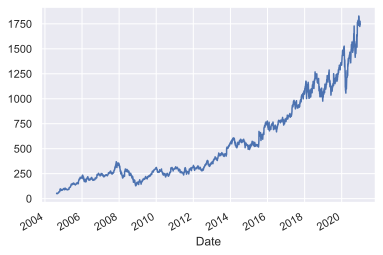

In [41]:
goog.plot();

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%config InlineBackend.figure_format = 'svg'

In [46]:
# 리샘플링 : 시계열 빈도 변경에 따라 데이터 표본을 재추출 하는 과정

# 분기별 평균값
goog.resample('Q').mean()


goog.resample('H').max()

Date
2004-08-19 00:00:00      49.982655
2004-08-19 01:00:00            NaN
2004-08-19 02:00:00            NaN
2004-08-19 03:00:00            NaN
2004-08-19 04:00:00            NaN
                          ...     
2020-12-30 20:00:00            NaN
2020-12-30 21:00:00            NaN
2020-12-30 22:00:00            NaN
2020-12-30 23:00:00            NaN
2020-12-31 00:00:00    1751.880005
Freq: H, Name: Close, Length: 143473, dtype: float64

In [50]:
goog

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-21      53.952770
2004-08-22      53.952770
2004-08-23      54.495735
                 ...     
2020-12-27    1738.849976
2020-12-28    1776.089966
2020-12-29    1758.719971
2020-12-30    1739.520020
2020-12-31    1751.880005
Freq: D, Name: Close, Length: 5979, dtype: float64

In [51]:
goog = goog.asfreq('D', method='pad')
print(goog)

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-21      53.952770
2004-08-22      53.952770
2004-08-23      54.495735
                 ...     
2020-12-27    1738.849976
2020-12-28    1776.089966
2020-12-29    1758.719971
2020-12-30    1739.520020
2020-12-31    1751.880005
Freq: D, Name: Close, Length: 5979, dtype: float64


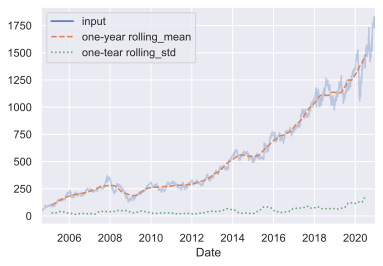

In [53]:
rolling = goog.rolling(365, center = True)

data = pd.DataFrame({'input' : goog,
                    'one-year rolling_mean' : rolling.mean(),
                    'one-tear rolling_std' : rolling.std()})

ax = data.plot(style=['-','--',':'])
ax.lines[0].set_alpha(0.3)